# Stock Prediction

## Importing libraries

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping

# Data

In [2]:
# Reading in the file
data = pd.read_csv('google_stocks.csv')
# data.shape = (1511, 7)
# Displaying the first entries
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-24,528.548889,535.320251,526.803650,534.622192,534.622192,1005052
1,2015-02-25,534.432739,544.724487,533.978943,542.380920,542.380920,1826000
2,2015-02-26,541.722717,554.617310,540.017395,553.959106,553.959106,2311529
3,2015-02-27,552.722473,563.163818,551.386169,556.871094,556.871094,2410199
4,2015-03-02,558.995300,570.583435,557.220154,569.775696,569.775696,2129631


## Linear Regression Model

In [3]:
# Dividing the data ()
train_len = math.ceil(len(data) * 0.8) # 1209 

y = np.array(data.filter(['Close']).values).reshape(-1, 1)
x = np.array(range(0, len(data))).reshape(-1, 1)

x_train = x[:train_len]
x_test = x[train_len:]
y_train = y[:train_len]
y_test = y[train_len:]

In [4]:
# Creating a model
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

# The coefficient
lin_model.coef_

array([[0.60875863]])

In [5]:
# Making predictions
y_pred = lin_model.predict(x_test)
y_pred2 = lin_model.predict(x_train)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred) # From the validation
print(mse) # 55188.886018563455

mse2 = mean_squared_error(y_train, y_pred2) # From the training
print(mse2) # 3629.0205301399697

55188.886018563455
3629.0205301399697


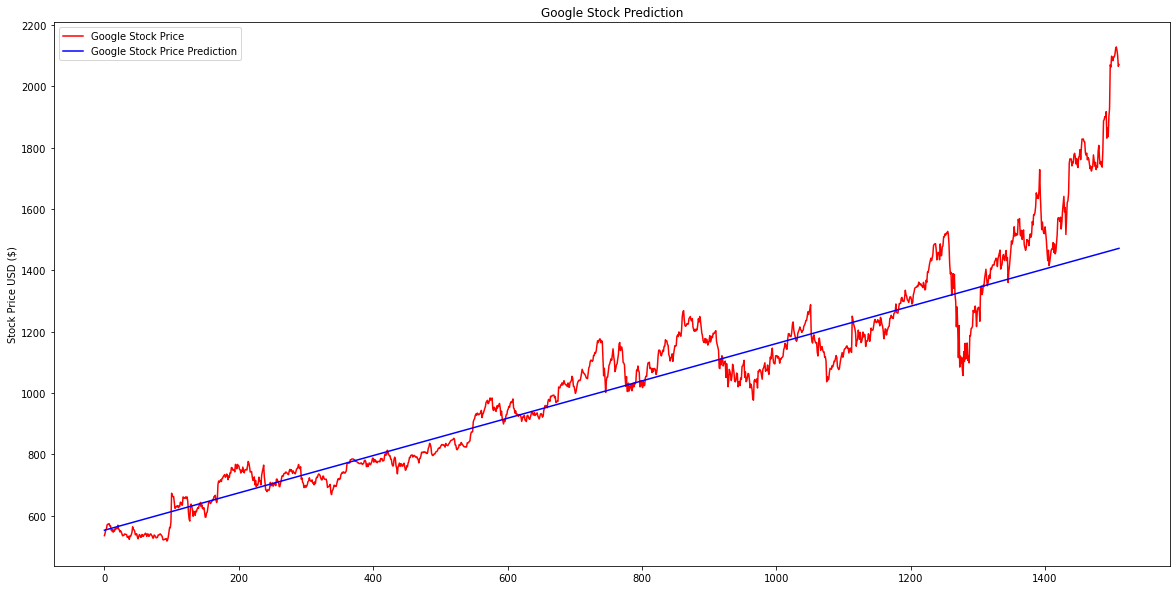

In [6]:
# Visualizing the whole dataset

plt.figure(figsize=(20,10))
plt.plot(x_test, y_test, color='red', label = 'Google Stock Price')
plt.plot(x_train, y_train, color='red')
plt.plot(x_test, y_pred, color='blue', label = 'Google Stock Price Prediction')
plt.plot(x_train, y_pred2, color='blue')
plt.ylabel('Stock Price USD ($)')
plt.title('Google Stock Prediction')
plt.legend()
plt.show()

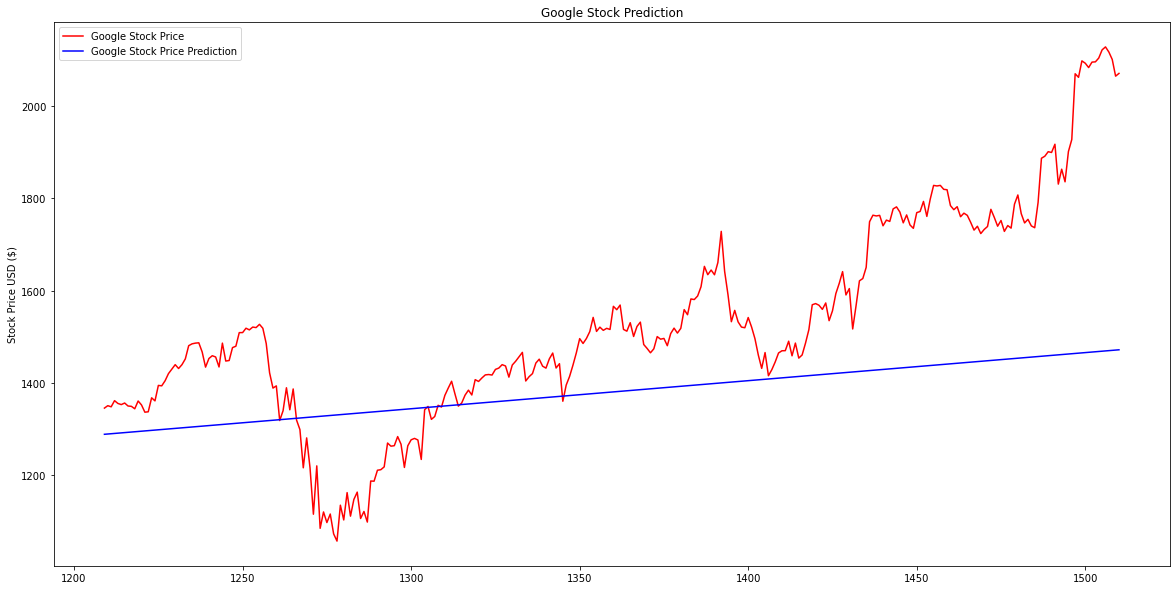

In [7]:
# Visualizing only the prediction part

plt.figure(figsize=(20,10))
plt.plot(x_test, y_test, color='red', label = 'Google Stock Price')
plt.plot(x_test, y_pred, color='blue', label = 'Google Stock Price Prediction')
plt.ylabel('Stock Price USD ($)')
plt.title('Google Stock Prediction')
plt.legend()
plt.show()

## Long Short Term Memory Model

In [8]:
# Dividing the data
train_len = math.ceil(len(data) * 0.8) # 1209

# Dividing our dataset into training 
training_data = data.iloc[:train_len, 1:2].values

In [9]:
# Normalizing the data
sc = MinMaxScaler(feature_range = (0, 1))
sc_training_data = sc.fit_transform(training_data)

# Creating a data structure with 60 time-stemps with only 1 output
x_train = []
y_train = []
for i in range(60, train_len):
    x_train.append(sc_training_data[i-60:i, 0])
    y_train.append(sc_training_data[i, 0])
    
# Transforming into a numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape = (1149, 60, 1)

In [10]:
# Creating datasets for later visualizations and predictions of the model
dataset_train = data.iloc[:train_len, 1:2] # From 0 to train_len
dataset_test = data.iloc[train_len:, 1:2] # From train_len to the end
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0) # Putting them together

dataset = dataset_total[train_len - 60:].values # For prediction
dataset = dataset.reshape(-1,1)
dataset = sc.transform(dataset) # Normalizing it

In [19]:
## Model 1
# The LSTM model with 50 neurons and 4 hidden layers
model1 = Sequential()
# Four hidden layers
model1.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model1.add(LSTM(units=50, return_sequences = True))
model1.add(LSTM(units=50, return_sequences = True))
model1.add(LSTM(units=50))


model1.add(Dense(units = 1)) # Output layer
model1.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compiling the model 
model1.fit(x_train, y_train, epochs=1, batch_size=1) # Fitting the data set

1149/1149 [==============================] - 103s 90ms/step - loss: 0.0055


In [12]:
## Model 2
# The LSTM model with 50 neurons and 4 hidden layers
model2 = Sequential()
# Four hidden layers with dropout regularization
model2.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50))
model2.add(Dropout(0.2))

model2.add(Dense(units = 1)) # Output layern
model2.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compiling the model
model2.fit(x_train, y_train, epochs=100, batch_size=32) # # Fitting the data set

Epoch 1/100
36/36 [==============================] - 13s 354ms/step - loss: 0.0315
Epoch 2/100
36/36 [==============================] - 7s 207ms/step - loss: 0.0064
Epoch 3/100
36/36 [==============================] - 6s 177ms/step - loss: 0.0056
Epoch 4/100
36/36 [==============================] - 7s 202ms/step - loss: 0.0051
Epoch 5/100
36/36 [==============================] - 6s 159ms/step - loss: 0.0051
Epoch 6/100
36/36 [==============================] - 7s 194ms/step - loss: 0.0050
Epoch 7/100
36/36 [==============================] - 6s 178ms/step - loss: 0.0047
Epoch 8/100
36/36 [==============================] - 6s 177ms/step - loss: 0.0048
Epoch 9/100
36/36 [==============================] - 7s 195ms/step - loss: 0.0047
Epoch 10/100
36/36 [==============================] - 6s 174ms/step - loss: 0.0049
Epoch 11/100
36/36 [==============================] - 7s 181ms/step - loss: 0.0046
Epoch 12/100
36/36 [==============================] - 6s 180ms/step - loss: 0.0043
Epoch 13/100

In [20]:
# Creating a test array for the prediction using the previously assigned dataset
x_test = []

for i in range(60, len(dataset)):
    x_test.append(dataset[i-60:i, 0])

# Transforming into a numpy array and reshaping it
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape # (302, 60, 1)

(302, 60, 1)

In [21]:
# Model 1
predicted_price1 = model1.predict(x_test) # Prediction based on testing data
predicted_price1 = sc.inverse_transform(predicted_price1)
predicted_price11 = model1.predict(x_train) # Prediction based on training data
predicted_price11 = sc.inverse_transform(predicted_price11)

# Model 2
predicted_price2 = model2.predict(x_test) # Prediction based on testing data
predicted_price2 = sc.inverse_transform(predicted_price2)
predicted_price22 = model2.predict(x_train) # Prediction based on training data
predicted_price22 = sc.inverse_transform(predicted_price22)

In [25]:
## Error loss
# Model 1
mse1 = np.mean((predicted_price1 - dataset_test)**2) # From the testing set, # 63494.042577
mse11 = np.mean((predicted_price11 - dataset_train[60: ])**2) # From the training set, # 3771.916702 

# Model 2
mse2 = np.mean((predicted_price2 - dataset_test)**2) # From the testing set, # 7995.087714
mse22 = np.mean((predicted_price22 - dataset_train[60: ])**2) # From the training set, # 458.328947

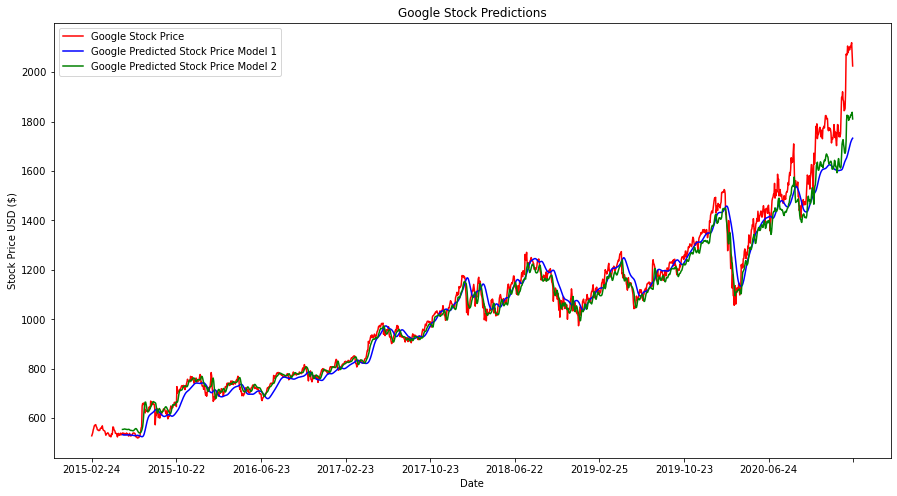

In [23]:
# Visualizing the whole dataset

plt.figure(figsize=(15,8))
plt.plot(data.loc[:, 'Date'], dataset_total.values, color = 'red', label = 'Google Stock Price')
plt.plot(data.loc[train_len:, 'Date'], np.array(predicted_price1), color = 'blue', label = 'Google Predicted Stock Price Model 1')
plt.plot(data.loc[61:train_len, 'Date'], np.array(predicted_price11), color = 'blue')
plt.plot(data.loc[train_len:, 'Date'], np.array(predicted_price2), color = 'green', label = 'Google Predicted Stock Price Model 2')
plt.plot(data.loc[61:train_len, 'Date'], np.array(predicted_price22), color = 'green')
plt.title('Google Stock Predictions')
plt.xticks(np.linspace(0, len(data), 10))
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend()
plt.show()

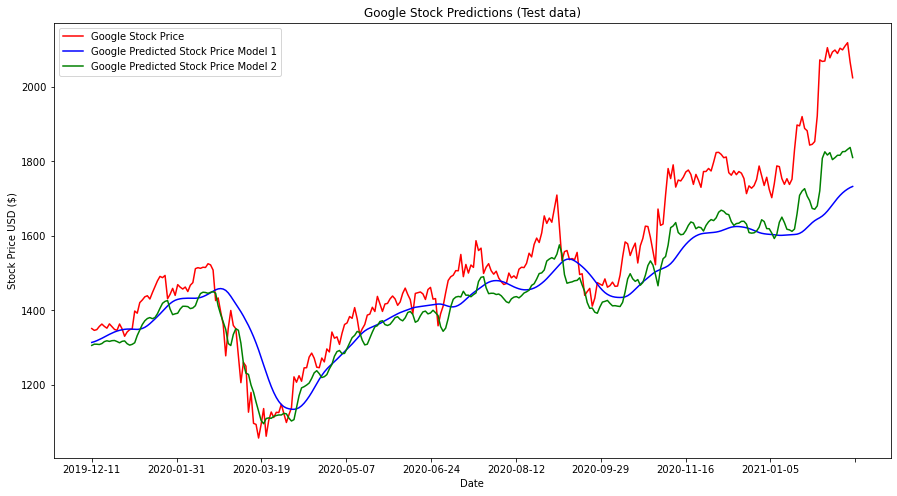

In [24]:
# Visualizing only the prediction part
# Visualizing the whole dataset

plt.figure(figsize=(15,8))
plt.plot(data.loc[train_len:, 'Date'], dataset_test.values, color = 'red', label = 'Google Stock Price')
plt.plot(data.loc[train_len:, 'Date'], np.array(predicted_price1), color = 'blue', label = 'Google Predicted Stock Price Model 1')
plt.plot(data.loc[train_len:, 'Date'], np.array(predicted_price2), color = 'green', label = 'Google Predicted Stock Price Model 2')
plt.title('Google Stock Predictions (Test data)')
plt.xticks(np.linspace(0, len(data) - train_len, 10))
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend()
plt.show()